In [7]:
import pandas as pd
import numpy as np

In [8]:
cd /Users/defoezhange/Documents/Predictive Model

/Users/defoezhange/Documents/Predictive Model


In [9]:
data = pd.read_csv('Math Proficiency Projection.csv')
data.head()

,StudentID,Grade,Fall 18-19 AP,Winter 18-19 AP,Actual Proficient
0,1000331,5,1,1,0
1,1000585,6,1,1,0
2,101140,3,1,1,0
3,102486,3,1,1,0
4,103256,6,1,1,0


In [10]:
dummies = pd.get_dummies(data.Grade)
dummies.head()

,3,4,5,6,7,8
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,1,0,0


In [13]:
data_with_dummies = pd.concat([data, dummies], axis = 'columns')
data_with_dummies.head()

,StudentID,Grade,Fall 18-19 AP,Winter 18-19 AP,Actual Proficient,3,4,5,6,7,8
0,1000331,5,1,1,0,0,0,1,0,0,0
1,1000585,6,1,1,0,0,0,0,1,0,0
2,101140,3,1,1,0,1,0,0,0,0,0
3,102486,3,1,1,0,1,0,0,0,0,0
4,103256,6,1,1,0,0,0,0,1,0,0


In [14]:
cols = [1, 5]
data_dummies = data_with_dummies.drop(data_with_dummies.columns[cols],axis = 1)
data_dummies = data_dummies.rename({4:"Grade_4", 5:"Grade_5", 6:"Grade_6", 7:"Grade_7", 8:"Grade_8"}, 
                                   axis = 'columns')
data_dummies = data_dummies[['StudentID', 'Grade_4', 'Grade_5', 'Grade_6', 'Grade_7', 'Grade_8', 
                             'Fall 18-19 AP', 'Winter 18-19 AP', 'Actual Proficient']]
data_dummies.head()

,StudentID,Grade_4,Grade_5,Grade_6,Grade_7,Grade_8,Fall 18-19 AP,Winter 18-19 AP,Actual Proficient
0,1000331,0,1,0,0,0,1,1,0
1,1000585,0,0,1,0,0,1,1,0
2,101140,0,0,0,0,0,1,1,0
3,102486,0,0,0,0,0,1,1,0
4,103256,0,0,1,0,0,1,1,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [18]:
y = data_dummies['Actual Proficient']

In [20]:
X = data_dummies.drop(['StudentID', 'Actual Proficient'], axis=1)
X['Fall 18-19 AP'], X['Winter 18-19 AP'] = X['Fall 18-19 AP']/100, X['Winter 18-19 AP']/100
X.head()

,Grade_4,Grade_5,Grade_6,Grade_7,Grade_8,Fall 18-19 AP,Winter 18-19 AP
0,0,1,0,0,0,0.01,0.01
1,0,0,1,0,0,0.01,0.01
2,0,0,0,0,0,0.01,0.01
3,0,0,0,0,0,0.01,0.01
4,0,0,1,0,0,0.01,0.01


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
model = SVC()
model.fit(X_train, y_train)
pred_svm = model.predict(X_test)

In [24]:
print(confusion_matrix(y_test,pred_svm))
print('\n')
print(classification_report(y_test,pred_svm))

[[304  25]
 [ 36  83]]


              precision    recall  f1-score   support

           0       0.89      0.92      0.91       329
           1       0.77      0.70      0.73       119

    accuracy                           0.86       448
   macro avg       0.83      0.81      0.82       448
weighted avg       0.86      0.86      0.86       448



# Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
pred_NB = model.predict(X_test)

In [28]:
print(confusion_matrix(y_test,pred_NB))
print('\n')
print(classification_report(y_test,pred_NB))

[[282  47]
 [ 28  91]]


              precision    recall  f1-score   support

           0       0.91      0.86      0.88       329
           1       0.66      0.76      0.71       119

    accuracy                           0.83       448
   macro avg       0.78      0.81      0.80       448
weighted avg       0.84      0.83      0.84       448



# K-Nearest Neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

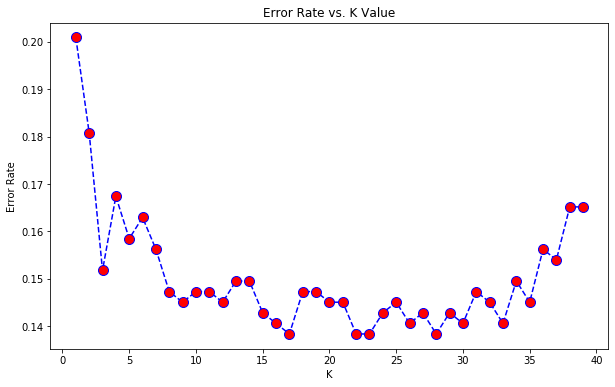

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [32]:
# NOW WITH K=17
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print('WITH K=17')
print('\n')
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

WITH K=17


[[300  29]
 [ 33  86]]


              precision    recall  f1-score   support

           0       0.90      0.91      0.91       329
           1       0.75      0.72      0.74       119

    accuracy                           0.86       448
   macro avg       0.82      0.82      0.82       448
weighted avg       0.86      0.86      0.86       448



# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)

In [35]:
print(confusion_matrix(y_test,dtree_pred))
print('\n')
print(classification_report(y_test,dtree_pred))

[[286  43]
 [ 56  63]]


              precision    recall  f1-score   support

           0       0.84      0.87      0.85       329
           1       0.59      0.53      0.56       119

    accuracy                           0.78       448
   macro avg       0.72      0.70      0.71       448
weighted avg       0.77      0.78      0.77       448



# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

In [38]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[294  35]
 [ 40  79]]


              precision    recall  f1-score   support

           0       0.88      0.89      0.89       329
           1       0.69      0.66      0.68       119

    accuracy                           0.83       448
   macro avg       0.79      0.78      0.78       448
weighted avg       0.83      0.83      0.83       448



In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
params = {
    'n_estimators': 20,
    'max_depth': 1,
    'learning_rate': 1,
    'criterion': 'mse'
}

In [41]:
gbc = GradientBoostingClassifier(**params)
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(X_test)


In [42]:
print(confusion_matrix(y_test,gbc_pred))
print('\n')
print(classification_report(y_test,gbc_pred))

[[305  24]
 [ 40  79]]


              precision    recall  f1-score   support

           0       0.88      0.93      0.91       329
           1       0.77      0.66      0.71       119

    accuracy                           0.86       448
   macro avg       0.83      0.80      0.81       448
weighted avg       0.85      0.86      0.85       448



In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_sample(X_train,y_train)

In [45]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))

Before OverSampling, counts of label '0': 805
Before OverSampling, counts of label '1': 238
After OverSampling, counts of label '0': 805
After OverSampling, counts of label '1': 805


In [46]:
svm = SVC()

In [47]:
svm.fit(X_train_res,y_train_res)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
pred_svm = svm.predict(X_test)

print(confusion_matrix(y_test,pred_svm))
print('\n')
print(classification_report(y_test,pred_svm))

[[269  60]
 [ 17 102]]


              precision    recall  f1-score   support

           0       0.94      0.82      0.87       329
           1       0.63      0.86      0.73       119

    accuracy                           0.83       448
   macro avg       0.79      0.84      0.80       448
weighted avg       0.86      0.83      0.84       448



In [51]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_res,y_train_res)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

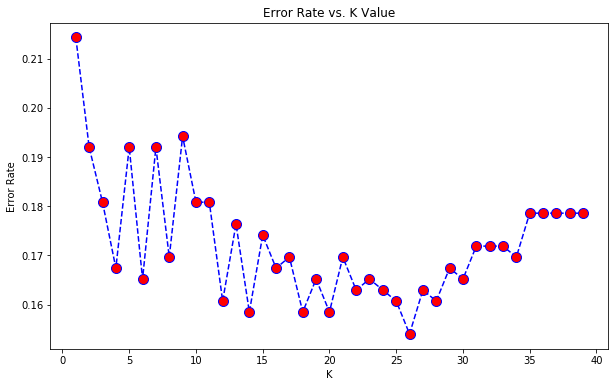

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [53]:
# NOW WITH K=26
knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(X_train_res,y_train_res)
knn_pred = knn.predict(X_test)

print('WITH K=26')
print('\n')
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

WITH K=26


[[278  51]
 [ 18 101]]


              precision    recall  f1-score   support

           0       0.94      0.84      0.89       329
           1       0.66      0.85      0.75       119

    accuracy                           0.85       448
   macro avg       0.80      0.85      0.82       448
weighted avg       0.87      0.85      0.85       448

